# **SVR Code for Predicting Plasticized PLA Impact Strength**

In [ ]:
## Import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [ ]:
## Import dataset
df = pd.read_excel('Dataset PLA-Plasticizer Bersih 54 Data.xlsx')
df

,Mol Mass_Content,PLA Mol Mass,PLA Content,Plasticizer Mol Mass,Plasticizer Density,Plasticizer Content,Impact Strength
0,147300.00000,155000,0.950,1000.000,1.200,0.050,15.40
1,139600.00000,155000,0.900,1000.000,1.200,0.100,14.90
2,131900.00000,155000,0.850,1000.000,1.200,0.150,11.60
3,124200.00000,155000,0.800,1000.000,1.200,0.200,11.10
4,84039.43500,86170,0.975,947.400,0.920,0.025,32.00
5,81908.87000,86170,0.950,947.400,0.920,0.050,32.30
6,79778.30500,86170,0.925,947.400,0.920,0.075,34.00
7,77647.74000,86170,0.900,947.400,0.920,0.100,38.42
8,171497.12000,180477,0.950,879.400,0.930,0.050,26.00
9,162517.24000,180477,0.900,879.400,0.930,0.100,32.00


In [ ]:
## Define the features and the output (Impact Strength)
X = df[['PLA Mol Mass','Plasticizer Mol Mass','Plasticizer Density','Plasticizer Content']]
y = df[['Impact Strength']]

In [ ]:
X

,PLA Mol Mass,Plasticizer Mol Mass,Plasticizer Density,Plasticizer Content
0,155000,1000.000,1.200,0.050
1,155000,1000.000,1.200,0.100
2,155000,1000.000,1.200,0.150
3,155000,1000.000,1.200,0.200
4,86170,947.400,0.920,0.025
5,86170,947.400,0.920,0.050
6,86170,947.400,0.920,0.075
7,86170,947.400,0.920,0.100
8,180477,879.400,0.930,0.050
9,180477,879.400,0.930,0.100


In [ ]:
y

,Impact Strength
0,15.40
1,14.90
2,11.60
3,11.10
4,32.00
5,32.30
6,34.00
7,38.42
8,26.00
9,32.00


In [ ]:
## Split the data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
## Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_X = MinMaxScaler()
scaler_y= MinMaxScaler()
# Fit and transform the training set
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)
# Fit and transform the test set
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

# Model Building

In [ ]:
## Build SVR model
from sklearn.svm import SVR
# Set SVR object and parameters
regressor = SVR(kernel = 'rbf', C=1000, gamma = 0.1)
# Fit the model into the training set
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=0.1)

In [ ]:
## Model prediction using test set
y_pred = regressor.predict(X_test)
y_pred = np.array(y_pred).reshape(-1,1)

In [ ]:
# Inverse transform the normalized prediction
unnormalized_y_pred = scaler_y.inverse_transform(y_pred)
true_y_test = scaler_y.inverse_transform(y_test)

In [ ]:
## Model performance evaluation
# R2 score
model_r2 = r2_score(true_y_test,unnormalized_y_pred)

print(model_r2)

0.6890175659956816


In [ ]:
# RMSE
model_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
is_rmse = np.sqrt(mean_squared_error(y_test[:,0],y_pred[:,0]))

print(model_rmse,is_rmse)

0.19343934608384378 0.19343934608384378


In [ ]:
# RRMSE
def rrmse(true_y_test,unnormalized_y_pred):
  return np.sqrt(mean_squared_error(true_y_test,unnormalized_y_pred))/np.average(true_y_test)*100

model_rrmse = rrmse(true_y_test,unnormalized_y_pred)
is_rrmse = rrmse(true_y_test[:,0],unnormalized_y_pred[:,0])

print(model_rrmse,is_rrmse)

37.229321576866255 37.229321576866255


# Comparison of actual and predicted impact strength

In [ ]:
## Comparison (Table)
result_unnormalized = pd.DataFrame(data=true_y_test)
result_unnormalized [['3']]=unnormalized_y_pred
result_unnormalized.columns = ['IS True','IS Predicted']
pd.set_option("display.max_rows", None)
result_unnormalized

,IS True,IS Predicted
0,43.40,44.823858
1,15.00,29.916972
2,43.00,41.889393
3,14.57,18.843251
4,30.50,26.639079
5,11.60,13.322771
6,22.00,22.552644
7,62.90,40.304169
8,48.00,59.474898
9,6.98,2.446016


<Figure size 432x288 with 0 Axes>

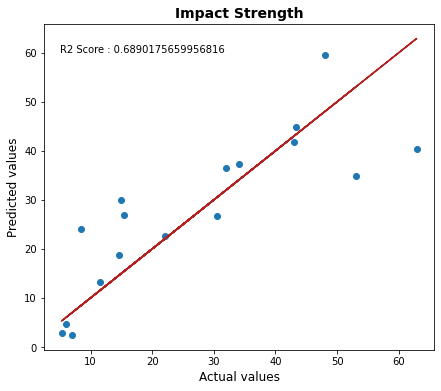

In [ ]:
# Comparison (Scatter plot)
fig = plt.figure()
fig, (plt1) = plt.subplots(1,figsize=(7,6))
plt1.scatter(true_y_test[:,0],unnormalized_y_pred[:,0])
plt1.set_ylabel('Predicted values', fontsize = 12)
plt1.set_xlabel('Actual values', fontsize = 12)
plt1.set_title('Impact Strength',weight='bold', fontsize = 14)
plt1.annotate('R2 Score : 0.6890175659956816', xy=(5,60))

plt1.plot(true_y_test[:,0],true_y_test[:,0],'firebrick')